In [1]:
import numpy as np 
from qiskit import * 
import math
from qiskit.circuit.library import RYGate
from qiskit.circuit import Parameter
import matplotlib.pyplot as plt

In [2]:
def scs(n,l) : 
    circ = QuantumCircuit(n)
    circ.cx(-2,-1)
    circ.cry(2*np.arccos(np.sqrt(1/n)),-1,-2)
    circ.cx(-2,-1)
    
    for i in range(l-1) : 
        circ.cx(-3-i,-1)
        ccry = RYGate(2*np.arccos(np.sqrt((2+i)/n))).control(2,label=None)
        circ.append(ccry,[-1,-2-i,-3-i])
        circ.cx(-3-i,-1)
    return circ 

def dicke_circ(n,k) : 
    pairs = []
    for a in range(n,k,-1) : 
        pairs.append([a,k])
    for a in range(k,1,-1) : 
        pairs.append([a,a-1])

    dk_circ = QuantumCircuit(n)
    dk_circ.x(range(-1,-k-1,-1))
    for pair in pairs : 
        dk_circ.append(scs(pair[0],pair[1]),range(pair[0]))
    return dk_circ

12


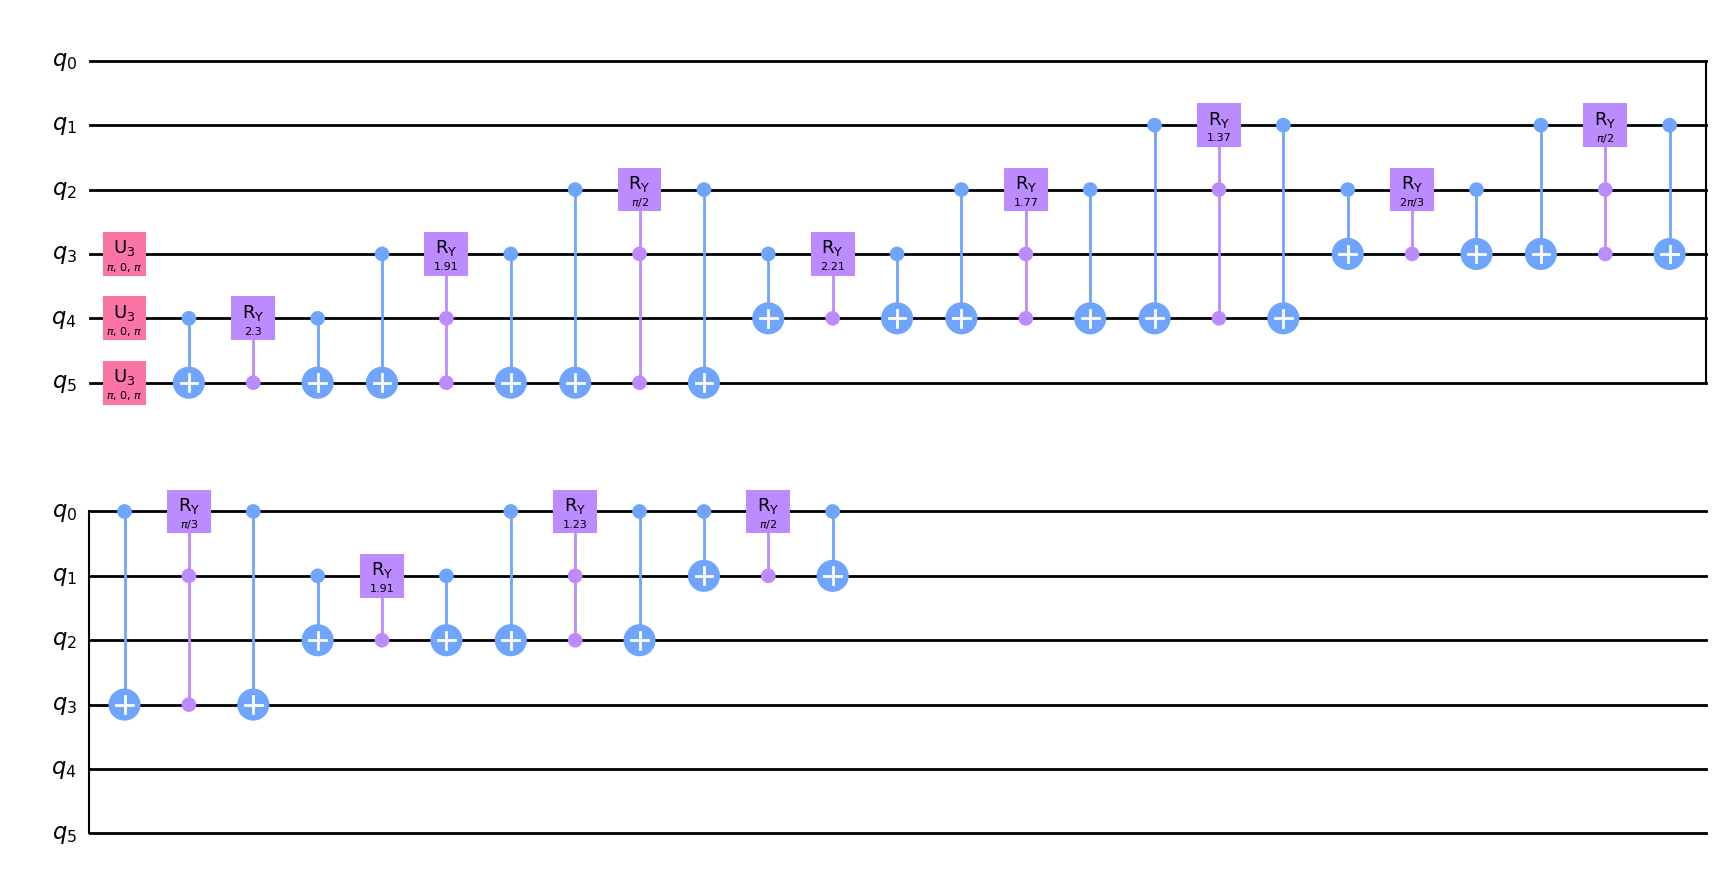

In [3]:
n=6
l=3
backend = Aer.get_backend('statevector_simulator')
job = execute(dicke_circ(n,l), backend)
result = job.result()
statevector = result.get_statevector()

#print(statevector)
k=l
print(int(3*(n-k) + k*(k-1)/2))
dicke_circ(n,l).decompose().draw('mpl')

In [4]:
def scs_param(n,l,var,param) : 

    circ = QuantumCircuit(n)
    circ.cx(-2,-1)
    circ.cry(param[var],-1,-2)
    var+=1
    circ.cx(-2,-1)

    for i in range(l-1) : 
        circ.cx(-3-i,-1)
        ccry = RYGate(param[var]).control(2,label=None)
        var+=1
        circ.append(ccry,[-1,-2-i,-3-i])
        circ.cx(-3-i,-1)
    return circ, var

def dicke_param(n,k) : 
    pairs = []
    for a in range(n,k,-1) : 
        pairs.append([a,k])
    for a in range(k,1,-1) : 
        pairs.append([a,a-1])

    num_angles = int(k*(n-k) + k*(k-1)/2) 
    param = [Parameter(f"angle_{i+1}") for i in range(num_angles)]

    dk_circ = QuantumCircuit(n)
    dk_circ.x(range(-1,-k-1,-1))
    var=0
    for pair in pairs : 
        new_circ,new_var = scs_param(pair[0],pair[1],var,param)
        var = new_var
        dk_circ.append(new_circ, range(pair[0]))
    return dk_circ

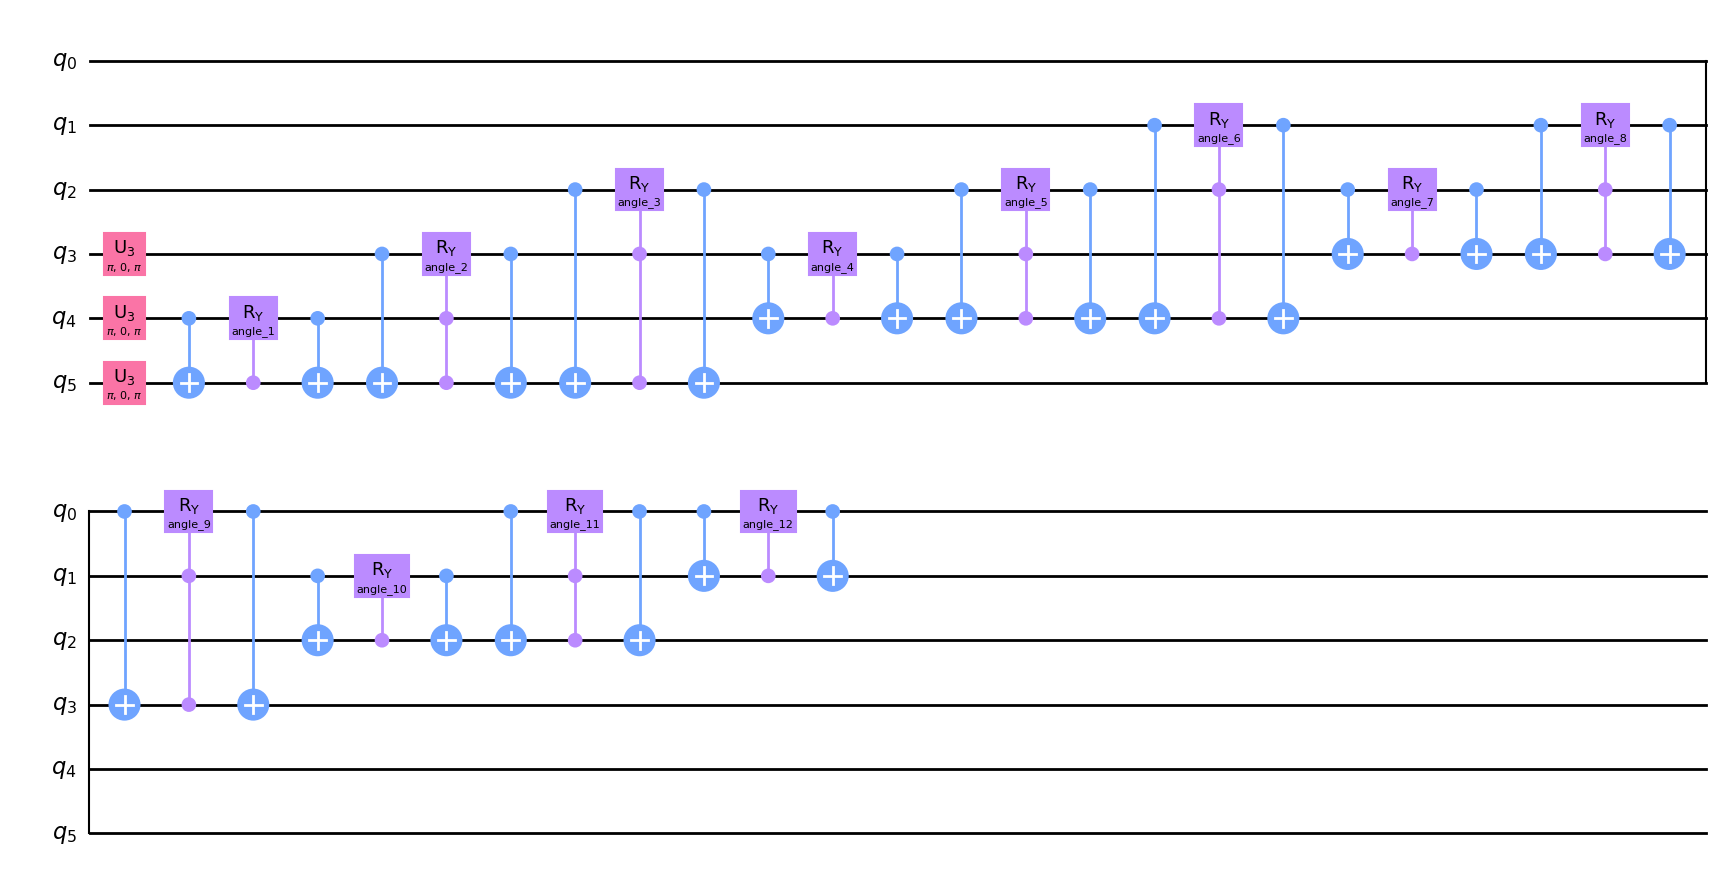

In [5]:
dicke_param(n,l).decompose().draw('mpl')

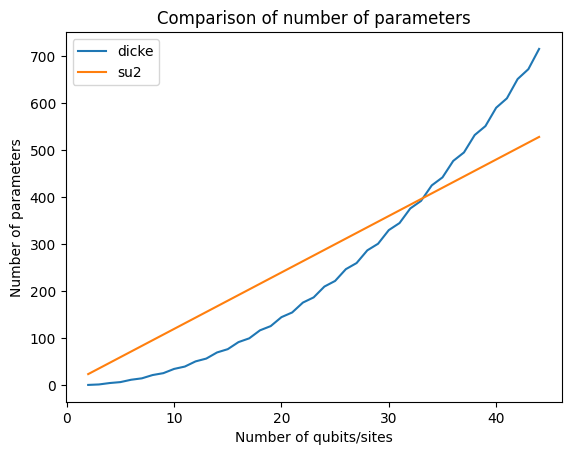

In [11]:
#Comparison of paramters 
param_dicke = []
param_su2 = []
max = 45
for n in range(2,max) : 
    k = n//2
    dicke = int(k*(n-k) + k*(k-1)/2)
    param_dicke.append(dicke)
    param_su2.append(4*n*3)
# plt.axhline(y=param_inter, color='black', linestyle='--', linewidth=1, alpha=0.5, 
#             label=f'n(Parameters) = {param_inter}')
# plt.axvline(x=n_inter, color='black', linestyle='--', linewidth=1, alpha=0.5, 
#             label=f' n(qubits) = {n_inter}')   
plt.plot(range(2,max),param_dicke, label='dicke')
plt.plot(range(2,max),param_su2, label='su2')
plt.xlabel('Number of qubits/sites')
plt.ylabel('Number of parameters')
plt.title('Comparison of number of parameters')
plt.legend()

In [ ]:
n=4
k=n//2
int(k*(n-k) + k*(k-1)/2)

In [ ]:
math.comb(4,2)

In [ ]:
2**22
